In [2]:
import torch
import numpy as np
import math
import matplotlib.pyplot as plt

In [3]:
red = np.loadtxt('./ex3red.dat')
green = np.loadtxt('./ex3green.dat')
blue = np.loadtxt('./ex3blue.dat')

In [4]:
print(blue)

[[2.58 4.46]
 [2.16 6.22]
 [1.27 4.23]
 [1.58 4.46]
 [1.16 5.7 ]
 [1.24 3.52]
 [1.1  3.91]
 [1.78 6.41]
 [1.9  3.22]
 [1.66 5.5 ]
 [2.2  5.2 ]
 [1.89 4.  ]
 [2.37 3.62]
 [2.3  2.94]]


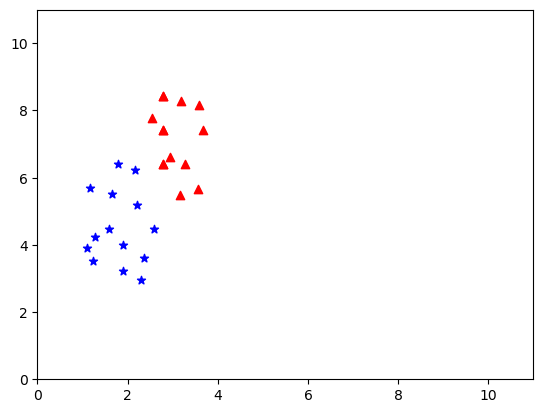

In [5]:
# print(f'blue[0]:{blue[:,0]}')
plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red', marker='^')
plt.xlim(0,11)
plt.ylim(0,11)
plt.show()

u1:[[1.79928571]
 [4.52785714]]
u2:[[3.04357143]
 [7.16642857]]


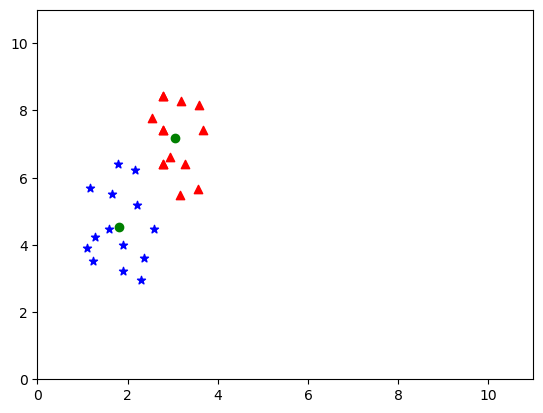

In [6]:
# LDA 2-classes

# blue
u1 = np.array([0., 0.])
N1 = len(blue)
for i in range(N1):
    u1 += blue[i]
u1 /= N1
u1 = u1[:, np.newaxis]  # 行向量变为列向量
# print(f'u1 s shape:{u1.shape}')
print(f'u1:{u1}')
# red
u2 = np.array([0., 0.])
N2 = len(red)
for i in range(N2):
    u2 += red[i]
u2 /= N2
u2 = u2[:, np.newaxis]
print(f'u2:{u2}')

# 绘图
plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red',marker='^')
plt.xlim(0,11)
plt.ylim(0,11)
plt.scatter(u1[0], u1[1], color='green')
plt.scatter(u2[0], u2[1], color='green')

In [7]:
# 计算类内散度
# blue
t = (blue[0][:,np.newaxis] - u1)
S1 = t @ t.T
# print(S1)
for i in range(1, N1):
    t = (blue[i][:, np.newaxis] - u1)
    tt = t @ t.T
    S1 += tt
print(f'S1:{S1}')

# red 
t = (red[0][:, np.newaxis] - u2)
S2 = t @ t.T
# print(S2)
for i in range(1, N2):
    t = (red[i][:, np.newaxis] - u2)
    tt = t @ t.T
    S2 += tt
print(f'S2: {S2}')

Sw = S1 + S2
print(f'Sw:{Sw}')

S1:[[ 3.05349286 -0.41882143]
 [-0.41882143 16.00663571]]
S2: [[ 1.74732143 -0.99842143]
 [-0.99842143 13.06632143]]
Sw:[[ 4.80081429 -1.41724286]
 [-1.41724286 29.07295714]]


In [8]:
# 计算Sb
Sb = (u1 - u2) @ (u1 - u2).T
print(f'Sb:{Sb}')

Sb:[[1.54824694 3.28313673]
 [3.28313673 6.96205918]]


In [9]:
# 计算最优参数
theta = np.linalg.inv(Sw) @ (u1 - u2)
print(f'theta:{theta}')
# 归一化
from sklearn.preprocessing import normalize
theta = normalize(theta.reshape(1, -1), norm='l2').T
print(f'归于化后的theta：{theta}')

theta:[[-0.29014995]
 [-0.10490107]]
归于化后的theta：[[-0.94042471]
 [-0.34000199]]


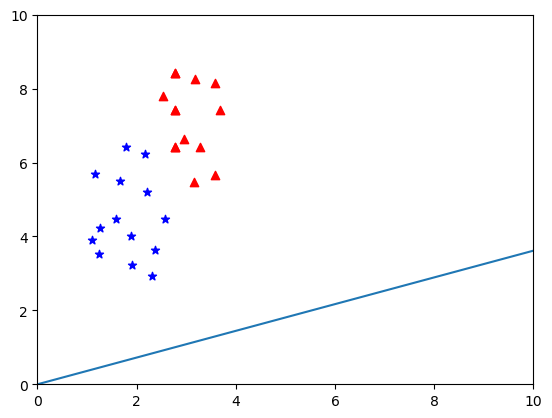

In [10]:
# 绘图
xx = np.linspace(0, 10, 100)
yy = xx * (theta[1][0] / theta[0][0])
plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red', marker='^')
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(xx, yy)

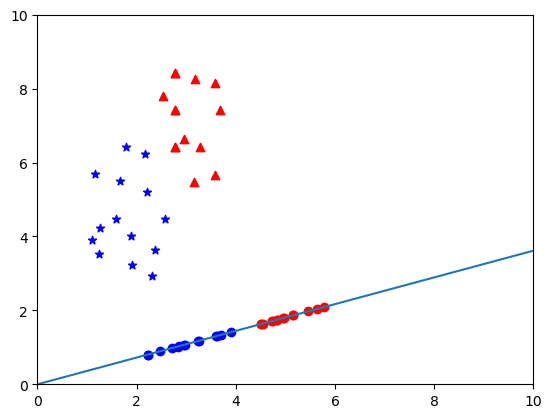

In [50]:
blue2 = blue @ theta @ theta.T / (theta[0] ** 2 + theta[1] **2)
red2 = red @ theta @ theta.T / (theta[0] ** 2 + theta[1] **2)
plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red', marker='^')
plt.xlim(0,10)
plt.ylim(0,10)
plt.plot(xx, yy)
plt.scatter(blue2[:,0], blue2[:,1], color = 'blue')
plt.scatter(red2[:,0], red2[:,1], color='red')

(0.0, 11.0)

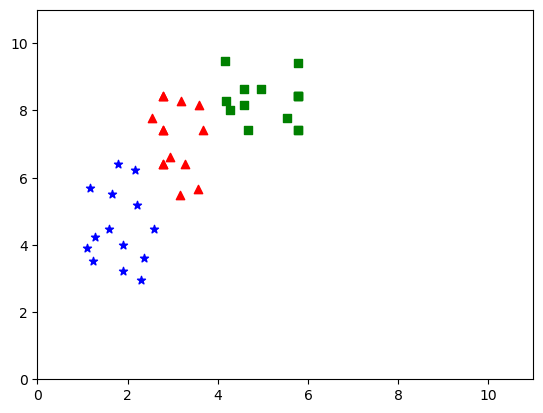

In [12]:
# LDA for N Classes
green = np.loadtxt('./ex3green.dat')

# 绘图
plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red', marker='^')
plt.scatter(green[:, 0], green[:, 1], color='green', marker='s')
plt.xlim(0,11)
plt.ylim(0,11)

In [13]:
# 计算3类的ui
N1 = len(blue)
N2 = len(red)
N3 = len(green)

u1 = np.zeros(2)
u2 = np.zeros(2)
u3 = np.zeros(2)

for i in range(N1):
    u1 += blue[i]
u1 /= N1

for i in range(N2):
    u2 += red[i]
u2 /= N2

for i in range(N3):
    u3 += green[i]
u3 /= N3

# 转为d*1
u1 = u1[:, np.newaxis]
u2 = u2[:, np.newaxis] 
u3 = u3[:, np.newaxis] 

print(f'u1:{u1}\nu2:{u2}\nu3:{u3}') 

u1:[[1.79928571]
 [4.52785714]]
u2:[[3.04357143]
 [7.16642857]]
u3:[[5.115     ]
 [8.28071429]]


In [14]:
# 计算Sb
Sb = np.zeros((2,2))

u = (u1 * N1 + u2 * N2 + u3 * N3) / (N1 + N2 + N3)  # d*1
print(f'u:{u}')

Sb = (N1 * (u1 - u) @ ((u1 - u).T))
Sb += (N2 * (u2 - u) @ ((u2 - u).T))
Sb += (N3 * (u3 - u) @ ((u3 - u).T))

print(f'Sb:{Sb}')

u:[[3.31928571]
 [6.65833333]]
Sb:[[ 78.55411429  84.16194286]
 [ 84.16194286 104.00893333]]


In [15]:
# 计算Sw
Sw1 = np.zeros((2,2))
Sw2 = np.zeros((2,2))
Sw3 = np.zeros((2,2))

# 把blue，red，green拼接起来
x = np.concatenate((blue, red, green), axis=0)
print(f'x:{x}')
N = len(x)
print(f'N:{N}')

# for i in range(N):
#     Sw1 += (x[i][:,np.newaxis] - u1) @ (x[i][:,np.newaxis] - u1).T
#     Sw2 += (x[i][:,np.newaxis] - u2) @ (x[i][:,np.newaxis] - u2).T
#     Sw3 += (x[i][:,np.newaxis] - u3) @ (x[i][:,np.newaxis] - u3).T
for i in range(N1):
    Sw1 += (blue[i][:,np.newaxis] - u1) @ (blue[i][:,np.newaxis] - u1).T
for i in range(N2):
    Sw2 += (red[i][:,np.newaxis] - u2) @ (red[i][:,np.newaxis] - u2).T
for i in range(N3):
    Sw3 += (green[i][:,np.newaxis] - u3) @ (green[i][:,np.newaxis] - u3).T

    
print(f'Sw1:{Sw1}\nSw2:{Sw2}\nSw3:{Sw3}')

Sw = Sw1 + Sw2 + Sw3
print(f'Sw:{Sw}')

x:[[2.58 4.46]
 [2.16 6.22]
 [1.27 4.23]
 [1.58 4.46]
 [1.16 5.7 ]
 [1.24 3.52]
 [1.1  3.91]
 [1.78 6.41]
 [1.9  3.22]
 [1.66 5.5 ]
 [2.2  5.2 ]
 [1.89 4.  ]
 [2.37 3.62]
 [2.3  2.94]
 [2.95 6.63]
 [2.53 7.79]
 [3.57 5.65]
 [3.16 5.47]
 [2.78 6.42]
 [2.78 7.42]
 [3.18 8.27]
 [3.28 6.42]
 [3.68 7.42]
 [3.58 8.16]
 [2.78 8.42]
 [2.78 6.42]
 [2.78 7.42]
 [2.78 8.42]
 [4.95 8.63]
 [5.53 7.79]
 [4.57 8.65]
 [4.16 9.47]
 [5.78 8.42]
 [5.78 7.42]
 [4.18 8.27]
 [4.28 8.02]
 [4.68 7.42]
 [4.58 8.16]
 [5.78 8.42]
 [5.78 9.42]
 [5.78 7.42]
 [5.78 8.42]]
N:42
Sw1:[[ 3.05349286 -0.41882143]
 [-0.41882143 16.00663571]]
Sw2:[[ 1.74732143 -0.99842143]
 [-0.99842143 13.06632143]]
Sw3:[[ 6.10875    -1.04085   ]
 [-1.04085     5.57489286]]
Sw:[[10.90956429 -2.45809286]
 [-2.45809286 34.64785   ]]


In [16]:
# compute the eigenvalues of Sw^-1@Sb and the corresponding eigenvectors
A = np.linalg.inv(Sw) @ Sb
print(f'A:{A}')

eigenvalues, eigenvectors = np.linalg.eig(A)
print(f'eigenvalues:{eigenvalues}\neigenvectors:{eigenvectors}')

A:[[7.87364785 8.52718858]
 [2.98766303 3.60684876]]
eigenvalues:[11.2200074   0.26048921]
eigenvectors:[[ 0.93088546 -0.74595516]
 [ 0.36531119  0.66599617]]


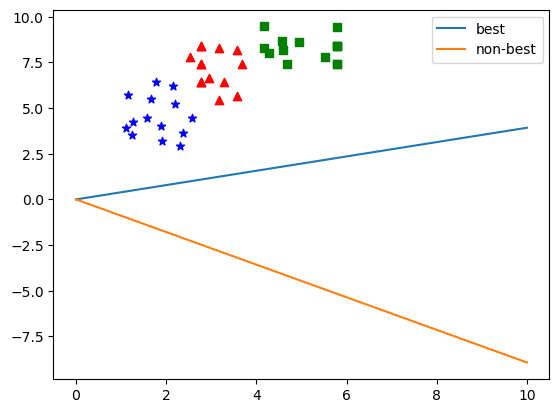

In [17]:
# 绘图
xx = np.linspace(0, 10, 100)
yy1 = xx * (eigenvectors[1][0]/eigenvectors[0][0])  #! 注意特征向量是纵向取的！
yy2 = xx * (eigenvectors[1][1]/eigenvectors[0][1])
plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red', marker='^')
plt.scatter(green[:, 0], green[:, 1], color='green', marker='s')
plt.plot(xx, yy1,label='best')
plt.plot(xx, yy2,label='non-best')
plt.legend()

[[2.58 4.46]
 [2.16 6.22]
 [1.27 4.23]
 [1.58 4.46]
 [1.16 5.7 ]
 [1.24 3.52]
 [1.1  3.91]
 [1.78 6.41]
 [1.9  3.22]
 [1.66 5.5 ]
 [2.2  5.2 ]
 [1.89 4.  ]
 [2.37 3.62]
 [2.3  2.94]]
[[3.75237357 1.47255931]
 [3.98693418 1.56460889]
 [2.53898158 0.99638293]
 [2.88582584 1.13249644]
 [2.94355375 1.15515084]
 [2.27154051 0.89142994]
 [2.28284834 0.89586752]
 [3.72225799 1.46074093]
 [2.74144315 1.07583575]
 [3.30881504 1.29849183]
 [3.67473196 1.4420901 ]
 [2.99802671 1.17652789]
 [3.28474573 1.28904621]
 [2.99284464 1.17449427]]


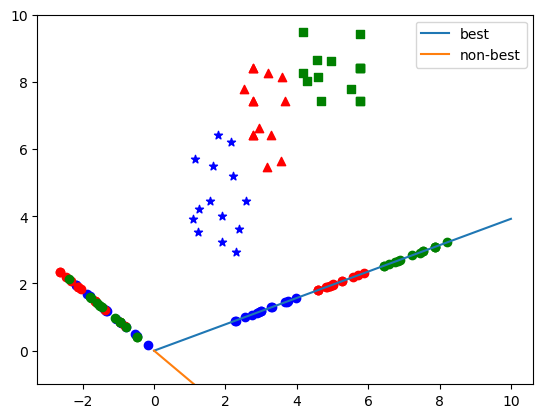

In [40]:
# 投影点
theta1 = np.array([[0.93088546],
 [0.36531119]])
# print(theta1)
# 归一化
# theta1 = normalize(theta1.reshape(1, -1), norm='l2').T
blue1 = blue @ theta1 @ theta1.T / (theta1[0] ** 2 + theta1[1] **2) # 14 * 2: 每行记录一个x 与 y
red1 = red @ theta1 @ theta1.T/ (theta1[0] ** 2 + theta1[1] **2)
green1 = green @ theta1 @ theta1.T/ (theta1[0] ** 2 + theta1[1] **2)
print(blue)
print(blue1)
theta2 = np.array([
    [-0.74595516],
    [0.66599617]
])
# 归一化
# print(theta2[0][0] ** 2 + theta2[1][0] ** 2)
# theta2 = normalize(theta2.reshape(1, -1), norm='l2').T
blue2 = blue @ theta2 @ theta2.T/ (theta2[0] ** 2 + theta2[1] **2)
red2 = red @ theta2 @ theta2.T/ (theta2[0] ** 2 + theta2[1] **2)
green2 = green @ theta2 @ theta2.T/ (theta2[0] ** 2 + theta2[1] **2)

plt.scatter(blue[:, 0], blue[:, 1], color='blue',marker='*')
plt.scatter(red[:, 0], red[:, 1], color='red', marker='^')
plt.scatter(green[:, 0], green[:, 1], color='green', marker='s')
# plt.xlim(0,10)
plt.ylim(-1,10)
plt.plot(xx, yy1,label='best')
plt.plot(xx, yy2,label='non-best')
plt.legend()
plt.scatter(blue1[:, 0], blue1[:, 1], color = 'blue')
plt.scatter(red1[:, 0], red1[:, 1], color='red')
plt.scatter(green1[:, 0], green1[:,1], color='green')
plt.scatter(blue2[:, 0], blue2[:, 1], color = 'blue')
plt.scatter(red2[:, 0], red2[:,1], color='red')
plt.scatter(green2[:,0], green2[:,1], color='green')
# print(blue1.shape)